# Solution 1

The location where the most number of funding is done is :  NCR 709


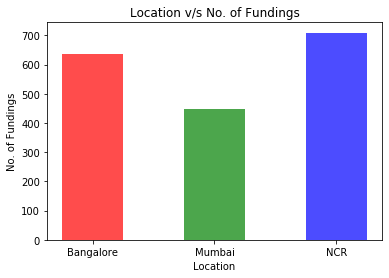

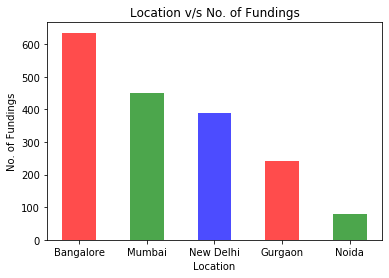

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading the dataframe
df=pd.read_csv("startup_funding.csv",encoding="utf-8")

# making copy so avoid any change in the dataset
df_start=df.copy()

# removing the NaN entries in the CityLocation column
df_start["CityLocation"].dropna(inplace=True)

# correcting the misspelled city names
df_start["CityLocation"].replace("Delhi" , "New Delhi",inplace=True)
df_start["CityLocation"].replace("bangalore" , "Bangalore",inplace=True)

# getting the desired city names
def correctCity(city):
    return city.split("/")[0].strip()
df_start["CityLocation"]=df_start["CityLocation"].apply(correctCity)

# checking for the given city names
loc=["Bangalore","Mumbai","New Delhi","Gurgaon","Noida"]

# removing the city names which are not required
for i in df_start["CityLocation"]:
    if i not in loc:
        index = df_start[df_start["CityLocation"]==i].index
        df_start.drop(index,inplace=True)

# Getting the count of funding city wise
city_count=df_start["CityLocation"].value_counts()

city_name=city_count.index
city_num=city_count.values

# combining the New Delhi, Gurgaon and Noida as NCR
loc_name=["Bangalore","Mumbai","NCR"]
loc_num=[city_num[0],city_num[1],city_num[2]+city_num[3]+city_num[4]]

# Printing the result
print("The location where the most number of funding is done is : ",loc_name[loc_num.index(max(loc_num))],max(loc_num))


#PLotting the graph between the city and No. of Fundings
plt.bar(loc_name,loc_num,width=0.5,color="rgb",alpha=0.7)
plt.xlabel("Location")
plt.ylabel("No. of Fundings")
plt.title("Location v/s No. of Fundings")
plt.show()

# PLotting the graph between the Location and No. of Fundings
plt.bar(city_name,city_num,width=0.5,color="rgb",alpha=0.7)
plt.xlabel("Location")
plt.ylabel("No. of Fundings")
plt.title("Location v/s No. of Fundings")
plt.show()


# Solution 2

Investor  	      |   No_of_time_invest
-------------------------------------------
Sequoia Capital       |         64
Accel Partners        |         53
Kalaari Capital       |         44
SAIF Partners         |         41
Indian Angel Network  |         40


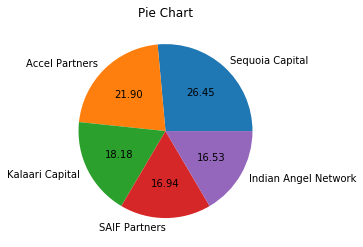

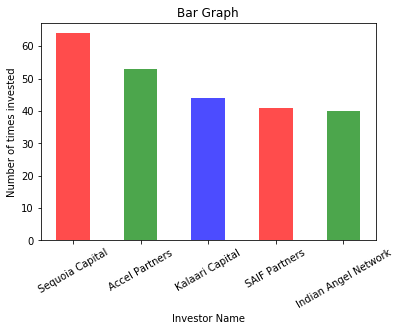

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading the dataframe
df=pd.read_csv("startup_funding.csv",encoding="utf-8")

# making copy so avoid any change in the dataset
df_start=df.copy()

# seperating investors name individually where multiple investors are present
a=df_start.InvestorsName.str.split(',')
a.dropna(inplace=True)

# creating a dictionary to store the count of each investor
d={}
for i in a:
    for j in i:
         d[j.strip()]=d.get(j.strip(),0)+1

# getting the top 5 investors from the dictionary
investor=[]
count=[]
for k in range(5):
    m=max(d.values())
    for i in d:
        if d[i]==m:
            investor.append(i)
            count.append(d[i])
            break
    del d[i]
print("Investor  \t      |   No_of_time_invest")
print("-------------------------------------------")
for i in range(5):
    print('{:<22s}|{:>11d}'.format(investor[i],count[i]))
    
# plotting pie chart
plt.pie(count,labels=investor,autopct="%.2f")
plt.title("Pie Chart")
plt.show()

# plotting bar graph
plt.bar(investor,count,width=0.5,color="rgb",alpha=0.7)
plt.xlabel('Investor Name')
plt.ylabel('Number of times invested')
plt.xticks(rotation=30)
plt.title("Bar Graph")
plt.show()

# Solution 3

Investor  	      |   No_of_time_invest
-------------------------------------------
Sequoia Capital       |         48
Accel Partners        |         47
Kalaari Capital       |         41
Indian Angel Network  |         40
Blume Ventures        |         36



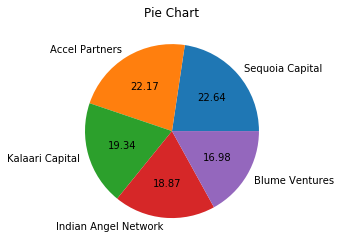

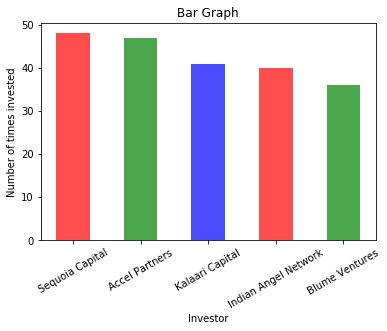

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the dataframe
df=pd.read_csv("startup_funding.csv",encoding="utf-8")

# making copy so avoid any change in the dataset
df_start=df.copy()

# correcting the company names
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed Investors','',inplace=True)
df_start['StartupName'].fillna('Unknown',inplace=True)
df_start['InvestorsName'].fillna('Unknown',inplace=True)

startup_name=df_start['StartupName']
investor_name=df_start['InvestorsName']

# getting the top 5 investors from the dictionary
# 1. storing the data in dictionary
d={}
i=0
for ele in investor_name:
    p=str(ele)
    q=p.split(",")
    for e in q:
        e=e.strip()
        if e in d:
            d[e]+=[startup_name[i]]
        else:
            d[e]=[startup_name[i]]
    i=i+1
for ele in d:
    d[ele]=len(set(d[ele]))
# Now getting the top 5 values from dictionary
for ele in d:
    d[ele]=len(set(d[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in d:
        if ele!="":
            if max<d[ele]:
                max=d[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del d[ct]
    
    
print("Investor  \t      |   No_of_time_invest")
print("-------------------------------------------")
for i in range(5):
    print('{:<22s}|{:>11d}'.format(investor[i],count[i]))
print()

# plotting pie chart
plt.pie(count,labels=investor,autopct="%.2f")
plt.title("Pie Chart")
plt.show()

# plotting bar graph
plt.bar(investor,count,width=0.5, color="rgb",alpha=0.7)
plt.xlabel('Investor')
plt.ylabel('Number of times invested')
plt.title("Bar Graph")
plt.xticks(rotation=30)
plt.show()

In [4]:
startup_name

0               TouchKin
1                Ethinos
2           Leverage Edu
3                   Zepo
4           Click2Clinic
5          Billion Loans
6       Ecolibriumenergy
7                  Droom
8              Jumbotail
9                 Moglix
10            Timesaverz
11                Minjar
12           MyCity4kids
13              Clip App
14           Upwardly.in
15            Autorox.co
16                Fabogo
17            Flickstree
18           Design Cafe
19              Innoviti
20              VDeliver
21              Bottr.me
22              Arcatron
23              QwikSpec
24               Chumbak
25               Increff
26                Vayana
27             MObiquest
28                 Ambee
29       Ideal Insurance
              ...       
2342             Refiral
2343        Ping Digital
2344     HealthyWorld.in
2345        Hostel Dunia
2346     Play your sport
2347             Yo Grad
2348              Enabli
2349                 CBS
2350           Hopscotch


# Solution 4 

Investor  	      |   No_of_time_invest
-------------------------------------------
Indian Angel Network  |         33
Rajan Anandan         |         23
LetsVenture           |         16
Anupam Mittal         |         16
Kunal Shah            |         14



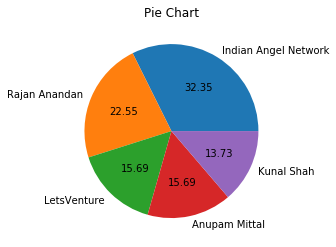

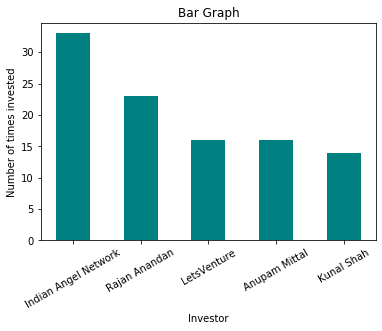

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the dataframe
df = pd.read_csv("startup_funding.csv")

# making copy so avoid any change in the dataset
df_start=df.copy()

# correcting the company names
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df_start['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df_start['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df_start['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed Investors','',inplace=True)

df_start.StartupName.fillna('Unknown',inplace=True)
df_start.InvestorsName.fillna('Unknown',inplace=True)

dif=df_start[(df_start['InvestmentType']=='Seed Funding') | (df_start['InvestmentType']=='Crowd Funding')]
dif.reset_index(drop=True,inplace=True)

ds=dif['StartupName']
di=dif['InvestorsName']
d={}
i=0
for ele in di:
    p=str(ele)
    q=p.split(",")
    for e in q:
        e=e.strip()
        if e in d:
            d[e]+=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1
for ele in d:
    d[ele]=len(set(d[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in d:
        if ele!="":
            if max<d[ele]:
                max=d[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del d[ct]
print("Investor  \t      |   No_of_time_invest")
print("-------------------------------------------")
for i in range(5):
    print('{:<22s}|{:>11d}'.format(investor[i],count[i]))
print()

# plotting pie chart
plt.pie(count,labels=investor,autopct="%.2f")
plt.title("Pie Chart")
plt.show()

# plotting bar graph
plt.bar(investor,count,width=0.5,color="teal")
plt.xlabel('Investor')
plt.ylabel('Number of times invested')
plt.title("Bar Graph")
plt.xticks(rotation=30)
plt.show()


# Solution 5

Investor  	      |   No_of_time_invest
-------------------------------------------
Sequoia Capital       |         45
Accel Partners        |         43
Kalaari Capital       |         35
Blume Ventures        |         27
SAIF Partners         |         24



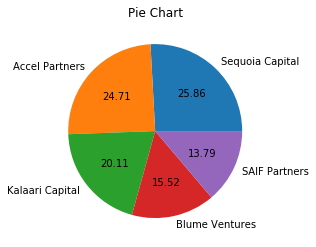

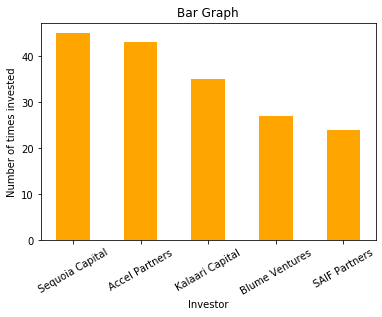

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the dataframe
df = pd.read_csv("startup_funding.csv")

# making copy so avoid any change in the dataset
df_start=df.copy()

# correcting the company names
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df_start['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df_start['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df_start['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('undisclosed investors','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed Investor','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed investor','Undisclosed Investors',inplace=True)
df_start['InvestorsName'].replace('Undisclosed Investors','',inplace=True)

df_start.StartupName.fillna('Unknown',inplace=True)
df_start.InvestorsName.fillna('Unknown',inplace=True)

dif=df_start[df_start['InvestmentType']=='Private Equity']
dif.reset_index(drop=True,inplace=True)

ds=dif['StartupName']
di=dif['InvestorsName']

d={}
i=0
for ele in di:
    p=str(ele)
    q=p.split(",")
    for e in q:
        e=e.strip()
        if e in d:
            d[e]+=[ds[i]]
        else:
            d[e]=[ds[i]]
    i=i+1
for ele in d:
    d[ele]=len(set(d[ele]))
investor=[]
count=[]
for i in range(5):
    max=-1
    for ele in d:
        if ele!="":
            if max<d[ele]:
                max=d[ele]
                ct=ele
    count.append(max)
    investor.append(ct)
    del d[ct]
    
print("Investor  \t      |   No_of_time_invest")
print("-------------------------------------------")
for i in range(5):
    print('{:<22s}|{:>11d}'.format(investor[i],count[i]))
print()

# plotting pie chart
plt.pie(count,labels=investor,autopct="%.2f")
plt.title("Pie Chart")
plt.show()

# plotting bar graph
plt.bar(investor,count,width=0.5,color="orange")
plt.xlabel('Investor')
plt.ylabel('Number of times invested')
plt.title("Bar Graph")
plt.xticks(rotation=30)
plt.show()
